In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv
/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
offensive_df=pd.read_csv('/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv')
offensive_df.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)
offensive_df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [4]:
twitter=pd.read_csv("/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv")

<Axes: xlabel='label', ylabel='count'>

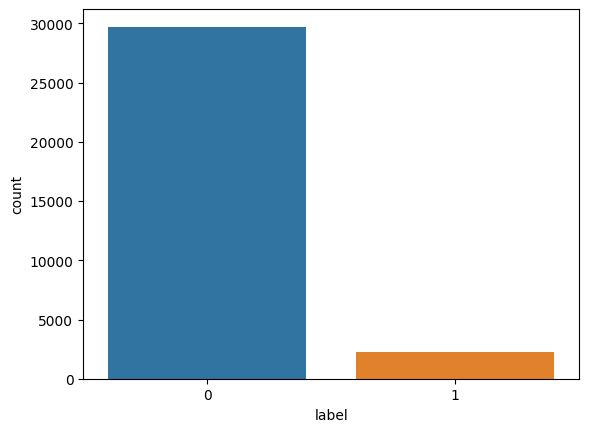

In [5]:
sns.countplot(x='label',data=twitter)

In [6]:
twitter.drop('id',axis=1,inplace=True)
twitter

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [7]:
offensive_df['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

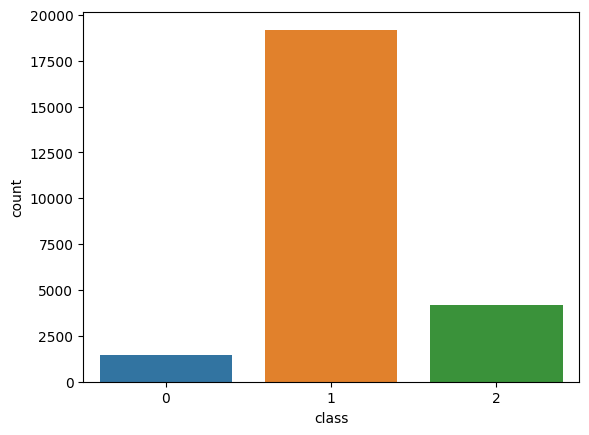

In [8]:
sns.countplot(x='class',data=offensive_df)

In [9]:
offensive_df[offensive_df['class']==0]['class']=1

/tmp/ipykernel_34/1219694573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offensive_df[offensive_df['class']==0]['class']=1


In [10]:
offensive_df['class'].unique()

array([2, 1, 0])

In [11]:
offensive_df[offensive_df['class']==1]

,class,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
...,...,...
24774,1,you really care bout dis bitch. my dick all in...
24775,1,"you worried bout other bitches, you need me for?"
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24780,1,young buck wanna eat!!.. dat nigguh like I ain...


In [12]:
offensive_df['class'].replace({0:1},inplace=True)

/tmp/ipykernel_34/3380510346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  offensive_df['class'].replace({0:1},inplace=True)


In [13]:
offensive_df['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

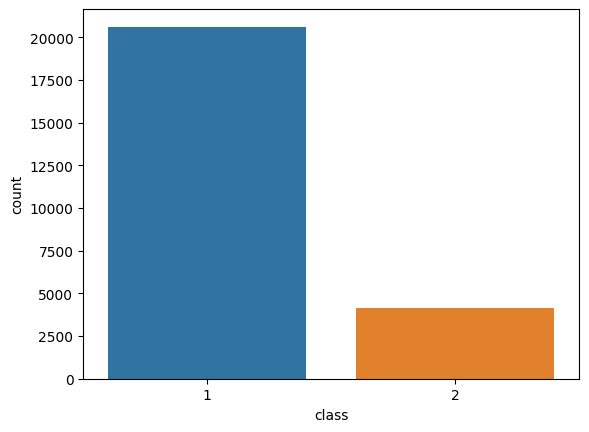

In [14]:
sns.countplot(x='class',data=offensive_df)

/tmp/ipykernel_34/2870642137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  offensive_df['class'].replace({2:0},inplace=True)


<Axes: xlabel='class', ylabel='count'>

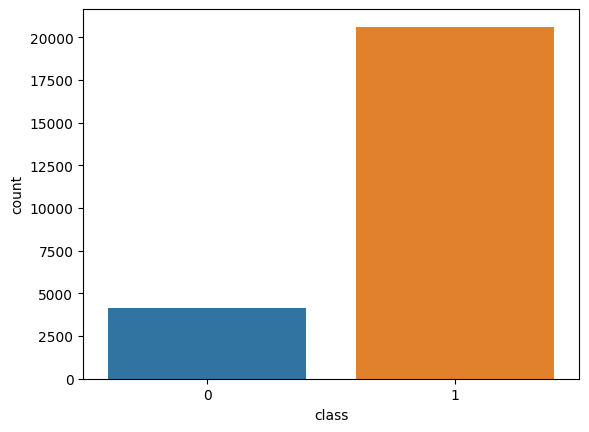

In [15]:
offensive_df['class'].replace({2:0},inplace=True)
sns.countplot(x='class',data=offensive_df)


In [16]:
offensive_df.rename(columns ={'class':'label'}, inplace = True)

In [17]:
offensive_df.loc[7]['tweet']

"!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;"

In [18]:
twi_ofn=[twitter,offensive_df]
df=pd.concat(twi_ofn)
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<Axes: xlabel='label', ylabel='count'>

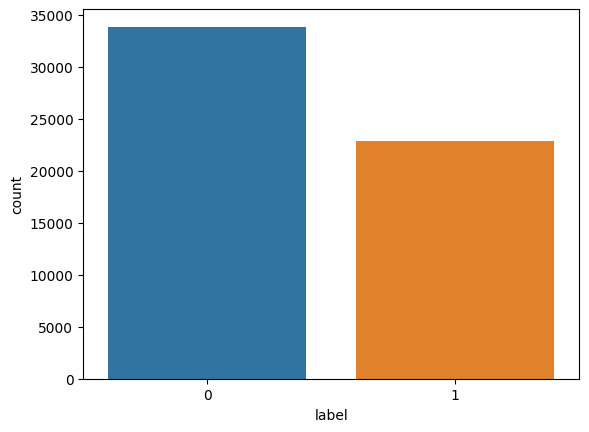

In [19]:
sns.countplot(x='label',data=df)

In [20]:
import re
import nltk
stemmer=nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words('english'))

In [21]:
def clean_text(input):
    input=str(input).lower()
    input=re.sub(" \['.*?\']",'',input)
    input=re.sub('https?://\S+|www\.\S+','',input)
    input=re.sub('\w*\d\w*', '', input)
    input=re.sub('<.*?>+','',input)
    input=re.sub('[%s]' % re.escape(string.punctuation),'',input)
    input=re.sub('\n','',input)
    input=[word for word in input.split(' ') if word not in stopwords]
    input=" ".join(input)
    input=[stemmer.stem(word) for word in  input.split(" ")]
    input=" ".join(input)
    return input
    

In [22]:
df['tweet']=df['tweet'].apply(clean_text)


In [23]:
df.shape

(56745, 2)

In [24]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [25]:
x=df['tweet']
y=df['label']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout,Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping


2024-07-01 21:53:58.929230: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 21:53:58.929351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 21:53:59.063372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
max_words=50000
max_len=300
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences=tokenizer.texts_to_sequences(x_train)
sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len)


In [29]:
from tensorflow.keras.initializers import RandomUniform
model=Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len,embeddings_initializer=RandomUniform()))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.build(input_shape=(None, max_len))
model.summary()

optimizer = RMSprop()
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 100)       │     5,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 300, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,080,501 (19.38 MB)

 Trainable params: 5,080,501 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
stop=EarlyStopping(
monitor='val_accuracy',
mode='max',
patience=5)

In [31]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=8,validation_split=0.1,callbacks=[stop])

Epoch 1/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 484ms/step - accuracy: 0.6367 - loss: 0.6363 - val_accuracy: 0.8954 - val_loss: 0.3427
Epoch 2/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 480ms/step - accuracy: 0.8940 - loss: 0.3064 - val_accuracy: 0.8914 - val_loss: 0.3162
Epoch 3/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 473ms/step - accuracy: 0.9072 - loss: 0.2648 - val_accuracy: 0.9328 - val_loss: 0.1946
Epoch 4/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 475ms/step - accuracy: 0.9359 - loss: 0.1826 - val_accuracy: 0.9394 - val_loss: 0.1819
Epoch 5/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 479ms/step - accuracy: 0.9450 - loss: 0.1573 - val_accuracy: 0.9436 - val_loss: 0.1666
Epoch 6/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 475ms/step - accuracy: 0.9513 - loss: 0.1422 - val_accuracy: 0.9469 - val_loss: 0.1617
Epoch 7/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 477ms/step - accuracy: 0.9570 - loss: 0.1281 - val_accuracy: 0.9453 - val_loss: 0.1625
Epoch 8/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 472ms/step - accuracy: 0.9606 - loss: 0.1172 - val_accuracy: 0.

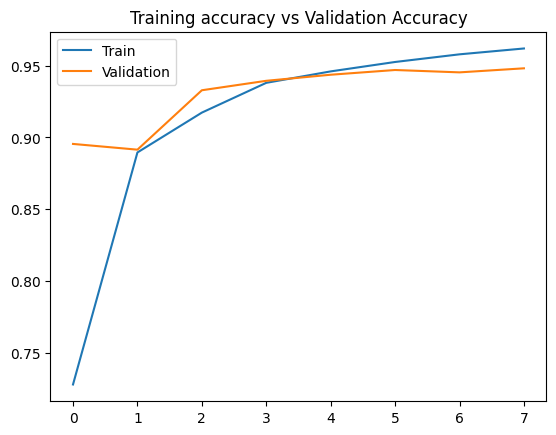

In [32]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title("Training accuracy vs Validation Accuracy")
plt.show()

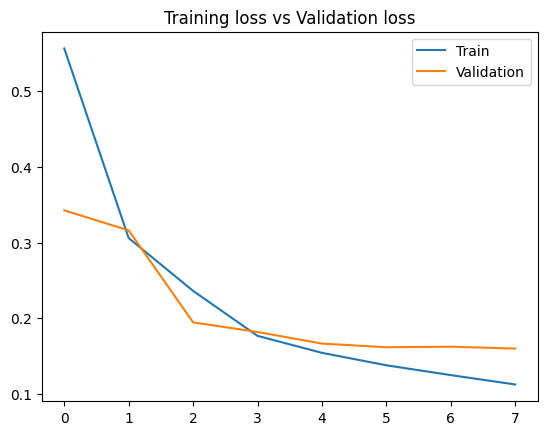

In [33]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.title("Training loss vs Validation loss")
plt.show()

In [34]:
test_sequence=tokenizer.texts_to_sequences(x_test)
test_sequence_matrix=sequence.pad_sequences(test_sequence,maxlen=max_len)

In [35]:
accuracy=model.evaluate(test_sequence_matrix,y_test)

444/444 ━━━━━━━━━━━━━━━━━━━━ 48s 108ms/step - accuracy: 0.9464 - loss: 0.1672


In [36]:
predict=model.predict(test_sequence_matrix)

444/444 ━━━━━━━━━━━━━━━━━━━━ 47s 105ms/step


In [37]:
ret=[]
for prediction in predict:
    if prediction<0.5:
        ret.append(0)
    else:
        ret.append(1)

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ret))

[[8233  220]
 [ 552 5182]]


In [39]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
model.save('hate.h5')

In [41]:
from tensorflow import keras
load_model=keras.models.load_model("./hate.h5")
with open('tokenizer.pickle','rb') as file:
    load_tokenizer=pickle.load(file)

In [42]:
test='You look like #$ bitch'
test=[clean_text(test)]
print(test)
seq=load_tokenizer.texts_to_sequences(test)
padd=sequence.pad_sequences(seq,maxlen=300)
print(seq)
pred=load_model.predict(padd)
print('Prediction: ', pred)
if pred<0.5:
  print('Peace')
else:
    print('Hate')


['look like  bitch']
[[26, 5, 2]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Prediction:  [[0.999006]]
Hate


In [43]:
test='You look like #$ Actress'
test=[clean_text(test)]
print(test)
seq=load_tokenizer.texts_to_sequences(test)
padd=sequence.pad_sequences(seq,maxlen=300)
print(seq)
pred=load_model.predict(padd)
print('Prediction: ', pred)
if pred<0.5:
  print('Peace')
else:
    print('Hate')

['look like  actress']
[[26, 5, 2246]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Prediction:  [[0.07952857]]
Peace


In [44]:
test='young buck wanna eat!!.. dat nigguh like I ain...'
test=[clean_text(test)]
print(test)
seq=load_tokenizer.texts_to_sequences(test)
padd=sequence.pad_sequences(seq,maxlen=300)
print(seq)
pred=load_model.predict(padd)
print('Prediction: ', pred)
if pred<0.5:
  print('Peace')
else:
    print('Hate')

['young buck wanna eat dat nigguh like']
[[303, 2853, 161, 131, 212, 674, 5]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Prediction:  [[0.9395259]]
Hate
